## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

In [3]:
from pathlib import Path

from bs_fdbck_clean.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck_clean.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck_clean.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck_clean.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/bs_fdbck_clean/data_info
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [7]:
from bs_fdbck_clean.constants import path_measurement_data
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [9]:
import datetime 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in model data. 

In [11]:
model_lev_i=-1
select_station = 'ATTO'

#### Model level different in UKESM because model has much finer resolution close to the ground 

In [12]:
model_lev_i_ukesm = -1

In [13]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [14]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [15]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### ECHAM SALSA:

In [16]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [17]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [18]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [19]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
ECHAM-SALSA
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS

In [20]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2024-01-24 16:33:05,104 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

{'model_name': 'ECHAM-SALSA', 'history_field': '.h1.', 'use_pressure_coords': False}
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-SALSA
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
ECHAM-S

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [21]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

### EC-Earth

In [22]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [23]:
case_name = 'ECE3_output_Sara'
case_name_ec_earth = 'ECE3_output_Sara'
from_time = '2012-01'
to_time = '2019-02'
time_res = 'hour'
space_res='locations'
model_name='EC-Earth'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ec_earth = [case_name]
di_mod2cases[model_name]=cases_ec_earth

#### Variables

In [24]:
varl =[
    'CCN0.20',
    'CCN1.00',
    'M_SO4NUS',
    'M_SOANUS',
    'M_BCAIS',
    'M_POMAIS',
    'M_SOAAIS',
    'M_SO4ACS',
    'M_BCACS',
    'M_POMACS',
    'M_SSACS',
    'M_DUACS',
    'M_SOAACS',
    'M_SO4COS',
    'M_BCCOS',
    'M_POMCOS',
    'M_SSCOS',
    'M_DUCOS',
    'M_SOACOS',
    'M_BCAII',
    'M_POMAII',
    'M_SOAAII',
    'M_DUACI',
    'M_DUCOI',
    'N_NUS',
    'N_AIS',
    'N_ACS',
    'N_COS',
    'N_AII',
    'N_ACI',
    'N_COI',
    'RWET_NUS',
    'RWET_AIS',
    'RWET_ACS',
    'RWET_COS',
    'RWET_AII',
    'RWET_ACI',
    'RWET_COI',
    'RDRY_NUS',
    'RDRY_AIS',
    'RDRY_ACS',
    'RDRY_COS',
    'od550aer',
    'od550oa',
    'od550soa',
    'od440aer',
    'od870aer',
    'od350aer',
    'loadsoa',
    'emiterp',
    'emiisop',
    
]
varl_ifs=[
    'var130',
    'var176',

]

#### Read in EC-Earth:

In [25]:
for case_name in cases_ec_earth:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc exists
EC-Earth
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sar

In [26]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

In [27]:
dic_ds = dict()
for ca in cases_ec_earth:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)


    ds_ifs = c.get_collocated_dataset(varl_ifs)


    ds = c.get_collocated_dataset(varl)
    ds = fix_timestamp_ec_earth(ds)
    ds_ifs = ds_ifs.rename({'lev':'lev_ifs'})


    ds = xr.merge([ds,ds_ifs])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2024-01-24 16:33:13,380 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var176_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]


{'model_name': 'EC-Earth', 'history_field': '.h1.', 'use_pressure_coords': False}
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var176_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
2024-01-24 16:33:13,380 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var176_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/var130_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/

2024-01-24 16:33:13,629 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_201

EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN0.20_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/CCN1.00_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SO4NUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_SOANUS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_BCAIS_ECE3_output_Sara_2012-01-01_2019-01-01_hour_locations.nc
EC-Earth
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/EC-Earth/ECE3_output_Sara/M_POMAIS_ECE3_output_Sara_2012-

In [28]:
dic_mod_ca['EC-Earth'] = dic_ds.copy()

In [29]:
dic_mod_ca['EC-Earth']['ECE3_output_Sara']

<xarray.Dataset>
Dimensions:    (station: 7, time: 61369, lev: 34, lev_ifs: 91)
Coordinates:
  * station    (station) object 'ATTO' 'BIR' 'HTM' 'SGP' 'SMR' 'SMR4' 'VHL'
  * time       (time) datetime64[ns] 2012-01-01 ... 2019-01-01
    time_orig  (time) datetime64[ns] 2012-01-01T00:30:00 ... NaT
  * lev        (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 30.0 31.0 32.0 33.0 34.0
  * lev_ifs    (lev_ifs) float64 1.0 2.0 3.0 4.0 5.0 ... 88.0 89.0 90.0 91.0
Data variables: (12/53)
    CCN0.20    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    CCN1.00    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCACS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAII    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCAIS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    M_BCCOS    (station, time, lev) float32 dask.array<chunksize=(7, 61369, 34), meta=np.ndarray>
    ...         ...
    od550aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550oa    (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od550soa   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    od870aer   (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>
    var130     (station, time, lev_ifs) float32 dask.array<chunksize=(7, 61369, 91), meta=np.ndarray>
    var176     (station, time) float32 dask.array<chunksize=(7, 61369), meta=np.ndarray>

### UKESM

In [30]:
case_name_ukesm = 'AEROCOMTRAJ'
case_name = case_name_ukesm
time_res = 'hour'
space_res = 'locations'
model_name = 'UKESM'

from_t = '2012-01-01'
to_t = '2019-01-01'

In [31]:
case_mod = case_name
cases_ukesm = [case_name]
di_mod2cases[model_name]=cases_ukesm

#### Variables

In [32]:
varl = [
    'Mass_Conc_OM_NS',
    'Mass_Conc_OM_KS',
    'Mass_Conc_OM_KI',
    'Mass_Conc_OM_AS',
    'Mass_Conc_OM_CS',
    'mmrtr_OM_NS',
    'mmrtr_OM_KS',
    'mmrtr_OM_KI',
    'mmrtr_OM_AS',
    'mmrtr_OM_CS',
    'nconcNS',
    'nconcKS',
    'nconcKI',
    'nconcAS',
    'nconcCS',
    'ddryNS',
    'ddryKS',
    'ddryKI',
    'ddryAS',
    'ddryCS',
    'Temp',
    'SFisoprene',
    'SFterpene',

]

#### Read in UKESM:

In [33]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                           # history_field=history_field
                           )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc exists
UKESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01

In [34]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                           )
    # history_field=history_field)




    ds = c.get_collocated_dataset(varl)


    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    ds = ds.rename({'model_level':'lev'})
    dic_ds[ca]=ds.copy()

{'model_name': 'UKESM', 'history_field': '.h1.', 'use_pressure_coords': False}
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr

2024-01-24 16:33:16,253 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_KI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_AS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/Mass_Conc_OM_CS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/mmrtr_OM_NS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc,


UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/nconcKS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/nconcKI_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/nconcAS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/nconcCS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/ddryNS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/AEROCOMTRAJ/ddryKS_AEROCOMTRAJ_2012-01-01_2019-01-01_hour_locations.nc
UKESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/c

In [35]:
dic_mod_ca['UKESM'] = dic_ds.copy()

In [36]:
_ds = dic_mod_ca['UKESM'][case_name_ukesm].sel(station='SMR')

In [37]:
_ds['hour'] = _ds['time.hour']
_ds

<xarray.Dataset>
Dimensions:          (time: 41408, lev: 85)
Coordinates:
  * time             (time) datetime64[ns] 2012-01-01 ... 2019-01-31T22:30:00
  * lev              (lev) float32 1.0 2.0 3.0 4.0 5.0 ... 82.0 83.0 84.0 85.0
    station          <U3 'SMR'
Data variables: (12/24)
    Mass_Conc_OM_AS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_CS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_KI  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_KS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    Mass_Conc_OM_NS  (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    SFisoprene       (time) float32 dask.array<chunksize=(41408,), meta=np.ndarray>
    ...               ...
    nconcAS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcCS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcKI          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcKS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    nconcNS          (time, lev) float32 dask.array<chunksize=(41408, 85), meta=np.ndarray>
    hour             (time) int64 0 1 3 4 6 7 9 10 ... 12 13 15 16 18 19 21 22

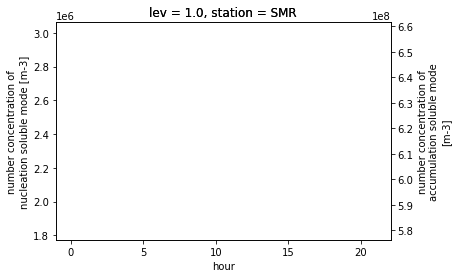

In [38]:
f, ax = plt.subplots()
_ds['nconcNS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax)
ax2 = ax.twinx()
_ds['nconcAS'].groupby(_ds['hour']).mean().isel(lev= 0).plot(ax = ax2, c='r')

### NORESM

#### Settings:

In [39]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [40]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [41]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [42]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [43]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [44]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       'NNAT_0',
       #'NCONC00',
       'NCONC02',
       'NCONC03',
       'NCONC04',
       'NCONC05',
       'NCONC06',
       'NCONC07',
       'NCONC08',
       'NCONC09',
       'NCONC10',
       'NCONC11',
       'NCONC12',
       'NCONC13',
       'NCONC14',
       'NMR01',
       #'NMR00',
       #'SIGMA00',
       'SIGMA01',
       'NMR02',
       'SIGMA02',
       'NMR03',
       'SIGMA03',
       'NMR04',
       'SIGMA04',
       'NMR05',
       'SIGMA05',
       'NMR06',
       'SIGMA06',
       'NMR07',
       'SIGMA07',
       'NMR08',
       'SIGMA08',
       'NMR09',
       'SIGMA09',
       'NMR10',
       'SIGMA10',
       'NMR11',
       'SIGMA11',
       'NMR12',
       'SIGMA12',
       'NMR13',
       'SIGMA13',
       'NMR14',
       'SIGMA14',
       #'hyam','hybm',
       'FSNS','FSDS_DRF',
       'FSNSC',
       'FSDSCDRF',
       #'hyai','hybi',
       'N500',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [45]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
NorESM
Checking if //pr

In [46]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

{'history_field': '.h1.', 'use_pressure_coords': False}
got to check_if_load_raw_necessary
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
NorESM


In [47]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2024-01-24 16:33:20,355 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

{'history_field': '.h1.', 'use_pressure_coords': False}
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAer

In [48]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2024-01-24 16:33:22,565 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

{'history_field': '.h1.', 'use_pressure_coords': False}
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
NorESM
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ss

In [49]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [50]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [51]:
dic_ds = {case_mod: ds_comb}

In [52]:
dic_mod_ca['NorESM'] = dic_ds.copy()

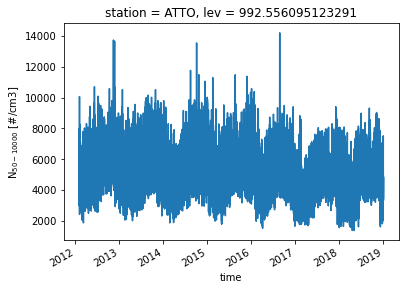

In [53]:
ds_comb['N50'].sel(station='ATTO').isel(lev=-1).plot()

In [54]:
vrlis = [f'NCONC{i:02}' for i in range(1,15)] +[f'NMR{i:02}' for i in range(1,15)] + [f'SIGMA{i:02}' for i in range(1,15)] 

In [55]:
from dask.diagnostics import ProgressBar

## SELECT STATION:


In [56]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
EC-Earth
UKESM
NorESM


## Select level: 

In [57]:
for mod in dic_mod_ca.keys():
    if mod in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        print(dic_mod_ca[mod][ca].lev)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
<xarray.DataArray 'lev' ()>
array(47.)
Coordinates:
    lev      float64 47.0
    station  <U4 'ATTO'
Attributes:
    standard_name:  hybrid_sigma_pressure
    long_name:      hybrid level at layer midpoints
    formula:        hyam hybm (mlev=hyam+hybm*aps)
    formula_terms:  ap: hyam b: hybm ps: aps
    units:          level
    positive:       down
NorESM
<xarray.DataArray 'lev' ()>
array(992.55609512)
Coordinates:
    station  <U4 'ATTO'
    lev      float64 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS


In [58]:
for mod in dic_mod_ca.keys():
    if mod not in ['EC-Earth', 'UKESM']:
        continue
    print(mod)
    if mod =='UKESM':
        print(f'Using level {model_lev_i_ukesm} for UKESM')
        lev_i_tm5 = -model_lev_i_ukesm-1
    else:
        lev_i_tm5 = -model_lev_i-1
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=lev_i_tm5)
        if mod=='EC-Earth':
            dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev_ifs=model_lev_i)
        dic_mod_ca[mod][ca].load()




EC-Earth
UKESM
Using level -1 for UKESM


TM5 has model levels going from the ground and up, IFS from the top and down.

## Adjust ECHAM-SALSA

In [59]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [60]:
from bs_fdbck_clean.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [61]:
import datetime

### Fix echam time

In [62]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [63]:
dic_mod_ca['ECHAM-SALSA'][case_name_echam]

<xarray.Dataset>
Dimensions:        (time: 61368)
Coordinates:
  * time           (time) datetime64[ns] 2012-01-01T00:52:30 ... 2018-12-31T2...
    lev            float64 47.0
    station        <U4 'ATTO'
Data variables: (12/50)
    lon            (time) float64 -59.0 -59.0 -59.0 -59.0 ... -59.0 -59.0 -59.0
    APIN_gas       (time) float32 2.932e-10 3.483e-10 ... 1.518e-10 1.979e-10
    BPIN_gas       (time) float32 2.516e-10 3.098e-10 ... 1.196e-10 1.653e-10
    CARENE3_gas    (time) float32 5.18e-11 6.386e-11 ... 2.526e-11 3.523e-11
    ISOP_gas       (time) float32 7.08e-09 7.426e-09 ... 3.697e-09 4.105e-09
    LIMON_gas      (time) float32 9.794e-11 1.207e-10 ... 4.76e-11 6.632e-11
    ...             ...
    up_sw          (time) float32 65.74 65.74 63.56 63.56 ... 94.67 43.71 43.71
    up_sw_cs       (time) float32 35.55 35.55 35.56 35.56 ... 82.31 39.69 39.69
    up_sw_cs_noa   (time) float32 31.78 31.78 31.79 31.79 ... 67.69 32.18 32.18
    up_sw_noa      (time) float32 66.43 66.43 64.31 64.31 ... 82.65 37.72 37.72
    uw             (time) float32 -0.7484 -0.5273 -0.4483 ... -1.139 -1.1 -1.16
    vw             (time) float32 -1.369 -1.304 -1.2 ... -1.086 -0.7067 -0.1798

### Run ds2df_echam

In [64]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=standard_air_density,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Computing N3 from mmrtrN3
N3
Computing N50 from mmrtrN50
N50
Computing N100 from mmrtrN100
N100
Computing N200 from mmrtrN200
N200
Computing N250 from mmrtrN250
N250
Computing N500 from mmrtrN500
N500
Computing ORG_mass_conc from ORG_mass and convertign units
ORG_mass_conc
Computing VBS1_gas_conc from VBS1_gas and convertign units
VBS1_gas_conc
Computing VBS0_gas_conc from VBS0_gas and convertign units
VBS0_gas_conc
Computing VBS10_gas_conc from VBS10_gas and convertign units
VBS10_gas_conc
Computing OAG
Computing cwp by 
cwp
Converting units from lcdnc_ct


,lon,lev,station,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,...,VBS10_gas_conc,OAG,cwp,ceff_um,lcdnc_cm3,lcdnc_ct_cm3,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-59.0002,47.0,ATTO,2.931832e-10,2.515792e-10,5.180026e-11,7.079898e-09,9.793604e-11,2.145323e-11,1.423970e-09,...,0.197274,2.068889,2.705714e+01,0.0,4.783581e-35,0.811277,26.190918,False,False,False
2012-01-01 01:00:00,-59.0002,47.0,ATTO,3.482556e-10,3.097826e-10,6.385913e-11,7.426337e-09,1.207040e-10,2.548136e-11,1.540301e-09,...,0.193837,2.213534,3.512339e+01,0.0,5.484764e-35,0.924431,26.067932,False,False,False
2012-01-01 02:00:00,-59.0002,47.0,ATTO,3.947769e-10,3.600097e-10,7.409357e-11,7.688816e-09,1.400615e-10,2.887356e-11,1.665855e-09,...,0.192664,2.373440,5.490721e+01,0.0,2.201568e-35,1.915001,25.956787,False,False,False
2012-01-01 03:00:00,-59.0002,47.0,ATTO,4.353823e-10,4.054387e-10,8.325560e-11,7.829044e-09,1.574087e-10,3.182829e-11,1.813054e-09,...,0.187679,2.556943,7.217193e+01,0.0,1.546854e-34,3.021109,25.729004,False,False,False
2012-01-01 04:00:00,-59.0002,47.0,ATTO,4.779764e-10,4.544035e-10,9.331325e-11,7.872870e-09,1.763201e-10,3.491344e-11,1.976106e-09,...,0.175494,2.752491,8.473399e+01,0.0,6.720216e-36,3.869489,25.426300,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-59.0002,47.0,ATTO,8.843717e-11,6.509326e-11,1.360179e-11,2.591986e-09,2.568169e-11,6.514321e-12,1.959533e-09,...,0.093965,2.652327,8.685692e+00,0.0,2.113276e-35,7.775736,28.190338,False,False,False
2018-12-31 20:00:00,-59.0002,47.0,ATTO,9.831195e-11,7.082539e-11,1.482158e-11,2.918637e-09,2.797420e-11,7.238111e-12,2.038069e-09,...,0.110518,2.774401,8.683560e-08,0.0,1.657924e-34,0.000000,28.020111,False,False,False
2018-12-31 21:00:00,-59.0002,47.0,ATTO,1.141370e-10,8.451511e-11,1.774000e-11,3.242098e-09,3.346036e-11,8.398934e-12,2.202076e-09,...,0.130449,3.009748,7.346821e-16,0.0,6.264084e-35,0.000000,27.716766,False,False,False


<AxesSubplot:xlabel='time'>

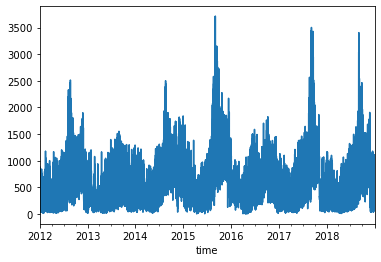

In [65]:
df['N100'].plot()

### Save result

In [66]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

## Adjust EC-Earth:

In [67]:
ds_ec_earth = dic_mod_ca['EC-Earth'][case_name_ec_earth]

#### Check all data there:

In [68]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import rad_vars, num_vars

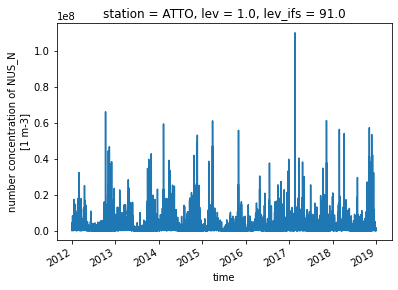

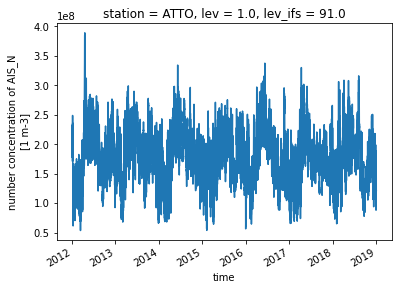

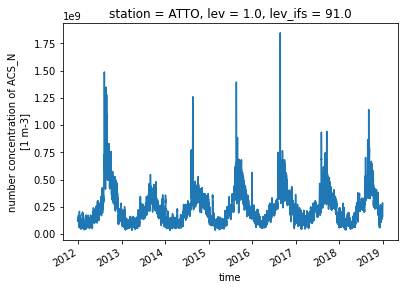

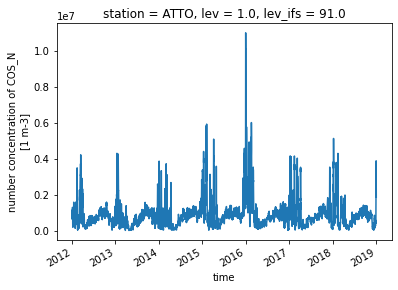

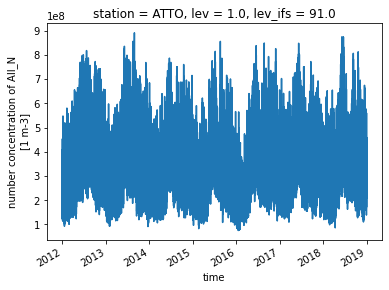

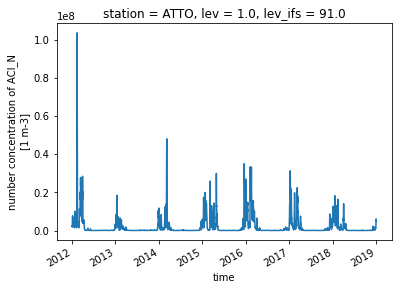

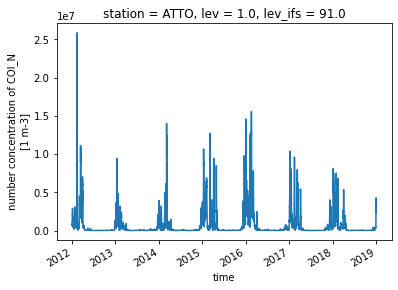

In [69]:
for n in num_vars:
    ds_ec_earth[n].plot()
    plt.show()

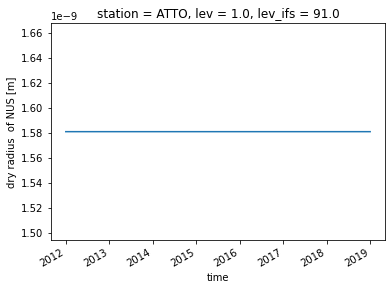

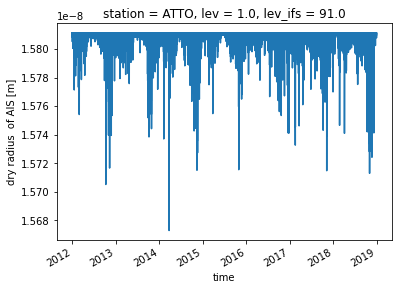

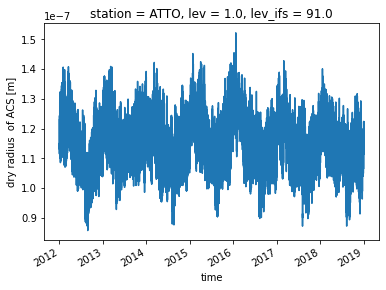

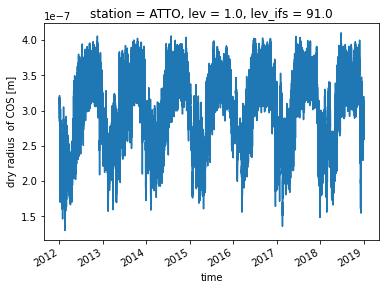

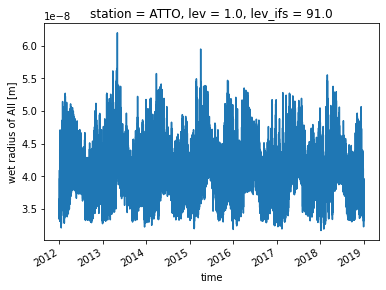

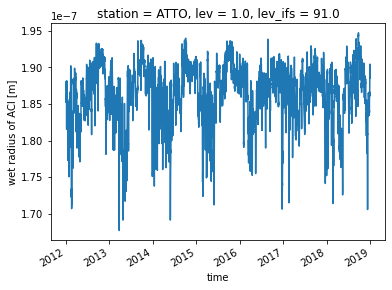

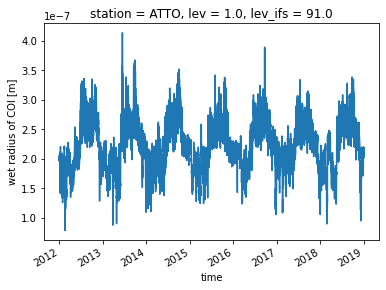

In [70]:
for n in rad_vars:
    ds_ec_earth[n].plot()
    plt.show()

In [71]:
from bs_fdbck_clean.util.BSOA_datamanip.ec_earth import ds2df_ec_earth

In [72]:

df, df_sm = ds2df_ec_earth(ds_ec_earth,
                        take_daily_median=False,
                        #air_density=air_dens,
                        model_lev_i =model_lev_i)
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting N_NUS from m-3 to cm-3
Converting N_AIS from m-3 to cm-3
Converting N_ACS from m-3 to cm-3
Converting N_COS from m-3 to cm-3
Converting N_AII from m-3 to cm-3
Converting N_ACI from m-3 to cm-3
Converting N_COI from m-3 to cm-3
Converting RDRY_NUS from m to nm
Converting RDRY_AIS from m to nm
Converting RDRY_ACS from m to nm
Converting RDRY_COS from m to nm
Converting RWET_AII from m to nm
Converting RWET_ACI from m to nm
Converting RWET_COI from m to nm
Converting M_SOANUS from kg/m3 to ug/m3
Converting M_POMAIS from kg/m3 to ug/m3
Converting M_SOAAIS from kg/m3 to ug/m3
Converting M_POMACS from kg/m3 to ug/m3
Converting M_SOAACS from kg/m3 to ug/m3
Converting M_POMCOS from kg/m3 to ug/m3
Converting M_SOACOS from kg/m3 to ug/m3
Converting M_POMAII from kg/m3 to ug/m3
Converting M_SOAAII from kg/m3 to ug/m3
renaming var130 to temp
renaming var176 to surf_net_srad


,station,time_orig,lev,CCN0.20,CCN1.00,M_BCACS,M_BCAII,M_BCAIS,M_BCCOS,M_DUACI,...,N150-500,N200-500,OA,POM,SOA,SOA2,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,ATTO,2012-01-01 00:30:00,1.0,105.695862,173.684845,7.822713e-11,1.254581e-11,5.228040e-13,1.014335e-14,4.633158e-10,...,101.577866,71.467260,1.780209,0.671167,1.109042,1.109042,NaN,False,False,False
2012-01-01 01:00:00,ATTO,2012-01-01 01:30:00,1.0,105.935394,174.508240,7.866249e-11,1.281314e-11,5.090797e-13,1.027601e-14,4.627448e-10,...,101.652320,71.537221,1.783110,0.674617,1.108493,1.108493,NaN,False,False,False
2012-01-01 02:00:00,ATTO,2012-01-01 02:30:00,1.0,105.877647,174.608749,7.891610e-11,1.286523e-11,5.015094e-13,1.035689e-14,4.611834e-10,...,101.437879,71.409586,1.777590,0.676585,1.101005,1.101005,NaN,False,False,False
2012-01-01 03:00:00,ATTO,2012-01-01 03:30:00,1.0,105.781235,174.746918,7.918174e-11,1.289636e-11,4.981230e-13,1.040564e-14,4.596272e-10,...,101.175959,71.236716,1.768838,0.678686,1.090153,1.090153,26.901184,False,False,False
2012-01-01 04:00:00,ATTO,2012-01-01 04:30:00,1.0,105.663040,174.931046,7.946592e-11,1.291415e-11,4.979260e-13,1.044667e-14,4.581297e-10,...,100.883535,71.034172,1.757645,0.680942,1.076703,1.076703,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,ATTO,2018-12-31 20:30:00,1.0,158.923477,211.702560,1.271348e-10,1.570133e-11,4.338952e-13,2.162828e-14,9.951869e-10,...,158.055800,111.772012,2.672641,1.089420,1.583221,1.583221,NaN,False,False,False
2018-12-31 21:00:00,ATTO,2018-12-31 21:30:00,1.0,153.891815,206.511978,1.226010e-10,1.508253e-11,4.160977e-13,2.069086e-14,9.740848e-10,...,152.244079,107.554269,2.573141,1.050692,1.522449,1.522449,26.287720,False,False,False
2018-12-31 22:00:00,ATTO,2018-12-31 22:30:00,1.0,149.376099,201.891266,1.185344e-10,1.471114e-11,4.013931e-13,1.981465e-14,9.539143e-10,...,147.335158,103.987670,2.485192,1.016505,1.468687,1.468687,NaN,False,False,False


### Assuming standard pressure for EC-Earth (since we don't have this and the effect is marginal)

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [73]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [74]:
df['T_C']

time
2012-01-01 00:00:00          NaN
2012-01-01 01:00:00          NaN
2012-01-01 02:00:00          NaN
2012-01-01 03:00:00    26.901184
2012-01-01 04:00:00          NaN
                         ...    
2018-12-31 20:00:00          NaN
2018-12-31 21:00:00    26.287720
2018-12-31 22:00:00          NaN
2018-12-31 23:00:00          NaN
2019-01-01 00:00:00    24.967773
Name: T_C, Length: 61369, dtype: float32

In [75]:
df['T_K'] = df['T_C'] + 273.15

<AxesSubplot:xlabel='hour'>

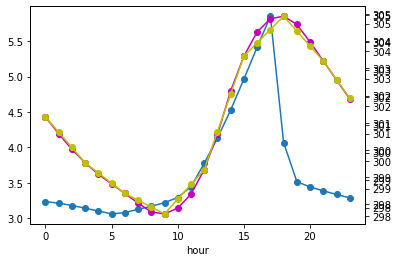

In [76]:
df_cp = df[['T_K','N50','OA']]

df_cp = df_cp.assign(hour=  df_cp.index.hour)

fig, ax = plt.subplots()
df_cp['OA'].groupby(df_cp['hour']).mean().plot(marker='o')
df_cp['T_K'].groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='r')
df_cp['T_K'].interpolate(method='quadratic').groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='m')

df_cp['T_K'].interpolate(method='linear').groupby(df_cp['hour']).mean().plot(marker='o', ax=ax.twinx(), c='y')

## Interpolate temperature quadratically before calculating density. 

In [77]:
df['T_K_interp'] = df['T_K'].interpolate(method='quadratic', limit=2)

In [78]:
df['density'] = 1e5/(R*df['T_K_interp'])
df['density_no_interp'] = 1e5/(R*df['T_K'])

<AxesSubplot:xlabel='time'>

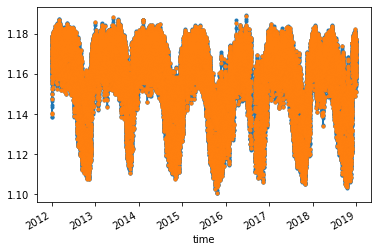

In [79]:
df['density'].plot(marker='.')
df['density_no_interp'].plot(marker='.')

<AxesSubplot:xlabel='time'>

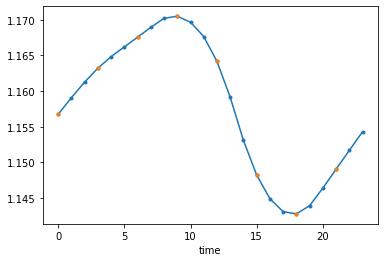

In [80]:
df['density'].groupby(df.index.hour).mean().plot(marker='.')
df['density_no_interp'].groupby(df.index.hour).mean().plot(marker='.')

In [81]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [82]:
vl = ['OA','N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50
converting N500


<AxesSubplot:xlabel='time'>

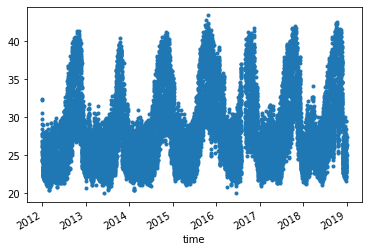

In [83]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

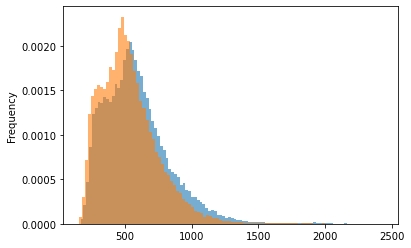

In [84]:
df['N50_STP'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()
df['N50_amb'].plot.hist(alpha=0.6, bins=100, density=True)#.columns#['Temperature'].plot()

### Save result

In [85]:


_di = {case_name_ec_earth:df}
_dism = {case_name_ec_earth:df_sm}

dic_df_mod_case['EC-Earth']= _di.copy()
dic_dfsm_mod_case['EC-Earth'] = _dism.copy()

## Adjust UKESM:

In [86]:
ds_ukesm = dic_mod_ca['UKESM'][case_name_ukesm]

#### Check all data there:

In [87]:
from bs_fdbck_clean.util.BSOA_datamanip.ukesm import diam_vars, num_vars

## Divide number concentrations by three: 
The number concentrations have been erronously multiplied by three in this data, so we here divide by three to compensate for that

In [88]:
number_concentration_params_ukesm = ['nconcAS',
 'nconcCS',
 'nconcKI',
 'nconcKS',
 'nconcNS']

In [89]:
  
        
def add_scaling(_ds, nvar):
    _ds[nvar+'_uncorrected'] = _ds[nvar].copy()
    _ds[nvar] = (1/3)*_ds[nvar].copy()
    _ds[nvar].attrs['corrected_scaling'] = 'True'
    print(f'Dividing {nvar} by three')
    return _ds


for nvar in number_concentration_params_ukesm:
    print(nvar)
    if 'corrected_scaling' in ds_ukesm[nvar].attrs:
        if ds_ukesm[nvar].attrs['corrected_scaling']=='True':
            continue
        else:
            ds_ukesm = add_scaling(ds_ukesm, nvar)    
    else:
        ds_ukesm = add_scaling(ds_ukesm, nvar)

nconcAS
Dividing nconcAS by three
nconcCS
Dividing nconcCS by three
nconcKI
Dividing nconcKI by three
nconcKS
Dividing nconcKS by three
nconcNS
Dividing nconcNS by three


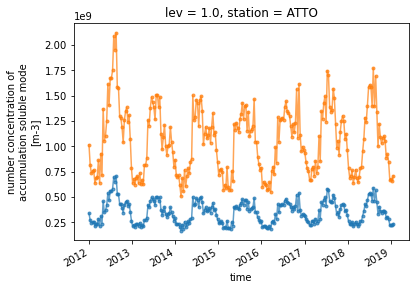

In [90]:
#ds_ukesm['nconcAS'].plot(marker='.')
ds_ukesm['nconcAS'].resample(time='10D').mean().plot(marker='.', alpha=.7)
ds_ukesm['nconcAS_uncorrected'].resample(time='10D').mean().plot(marker='.', alpha=.7)

#### Time step difference in UKESM

#### Adjust the emissions to be at the same timestep
The emission dataset is labelled at the beginning of each time period, the rest is in the middle. We therefore need to adjust it to fit the rest of the data. 

In [91]:
ukesm_sf_vars = ['SFisoprene','SFterpene']
ds_ukesm_sf = ds_ukesm[ukesm_sf_vars].dropna(dim='time').sel(time=slice('2012-01','2018-12'))
ds_ukesm_sf['time'].attrs['timestamp'] = 'mid'

In [92]:
if ds_ukesm_sf['time'].attrs['timestamp'] =='mid':
    ds_ukesm_sf['time'] = pd.to_datetime(ds_ukesm_sf['time'].values) - datetime.timedelta(hours=1.5)
    ds_ukesm_sf['time'].attrs['timestamp'] = 'start'

In [93]:
ds_ukesm_sf

<xarray.Dataset>
Dimensions:     (time: 20456)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:00:00
    lev         float32 1.0
    station     <U4 'ATTO'
Data variables:
    SFisoprene  (time) float32 0.0 0.0 0.0 ... 1.875e-09 1.152e-09 6.302e-11
    SFterpene   (time) float32 0.0 0.0 0.0 ... 2.877e-10 2.914e-10 1.067e-10

In [94]:
ds_ukesm_dropsf = ds_ukesm.drop(ukesm_sf_vars).dropna(dim='time', )
ds_ukesm_dropsf

<xarray.Dataset>
Dimensions:              (time: 20456)
Coordinates:
  * time                 (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:0...
    lev                  float32 1.0
    station              <U4 'ATTO'
Data variables: (12/26)
    Mass_Conc_OM_AS      (time) float32 2.939e-09 3.881e-09 ... 1.562e-09
    Mass_Conc_OM_CS      (time) float32 4.725e-11 5.328e-11 ... 2.892e-11
    Mass_Conc_OM_KI      (time) float32 1.396e-12 9.575e-12 ... 1.682e-15
    Mass_Conc_OM_KS      (time) float32 5.405e-10 1.298e-10 ... 5.848e-12
    Mass_Conc_OM_NS      (time) float32 4.186e-17 6.732e-17 ... 2.795e-19
    Temp                 (time) float32 303.8 302.7 302.0 ... 303.1 305.9 306.4
    ...                   ...
    nconcNS              (time) float32 1.861e+05 6.49e+04 ... 1.157e+03
    nconcAS_uncorrected  (time) float32 7.091e+08 1.144e+09 ... 5.251e+08
    nconcCS_uncorrected  (time) float32 1.9e+06 1.922e+06 ... 1.246e+06
    nconcKI_uncorrected  (time) float32 4.481e+06 3.191e+07 ... 1.897e+03
    nconcKS_uncorrected  (time) float32 8.357e+08 5.651e+08 ... 6.815e+07
    nconcNS_uncorrected  (time) float32 5.582e+05 1.947e+05 ... 3.472e+03

##### Merge again

In [95]:
ds_ukesm = xr.merge([ds_ukesm_dropsf,ds_ukesm_sf])
ds_ukesm

<xarray.Dataset>
Dimensions:              (time: 20456)
Coordinates:
  * time                 (time) datetime64[ns] 2012-01-01 ... 2018-12-31T21:0...
    lev                  float32 1.0
    station              <U4 'ATTO'
Data variables: (12/28)
    Mass_Conc_OM_AS      (time) float32 2.939e-09 3.881e-09 ... 1.562e-09
    Mass_Conc_OM_CS      (time) float32 4.725e-11 5.328e-11 ... 2.892e-11
    Mass_Conc_OM_KI      (time) float32 1.396e-12 9.575e-12 ... 1.682e-15
    Mass_Conc_OM_KS      (time) float32 5.405e-10 1.298e-10 ... 5.848e-12
    Mass_Conc_OM_NS      (time) float32 4.186e-17 6.732e-17 ... 2.795e-19
    Temp                 (time) float32 303.8 302.7 302.0 ... 303.1 305.9 306.4
    ...                   ...
    nconcCS_uncorrected  (time) float32 1.9e+06 1.922e+06 ... 1.246e+06
    nconcKI_uncorrected  (time) float32 4.481e+06 3.191e+07 ... 1.897e+03
    nconcKS_uncorrected  (time) float32 8.357e+08 5.651e+08 ... 6.815e+07
    nconcNS_uncorrected  (time) float32 5.582e+05 1.947e+05 ... 3.472e+03
    SFisoprene           (time) float32 0.0 0.0 0.0 ... 1.152e-09 6.302e-11
    SFterpene            (time) float32 0.0 0.0 0.0 ... 2.914e-10 1.067e-10

#### Plot 

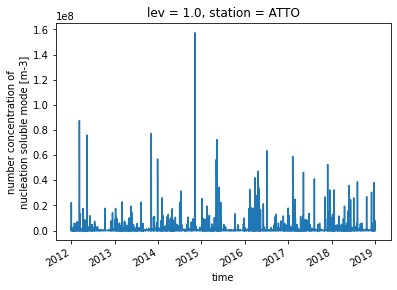

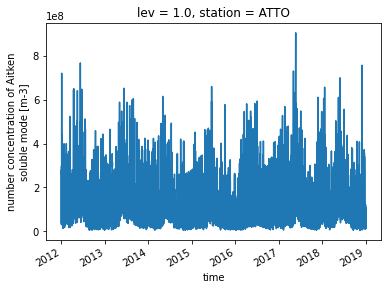

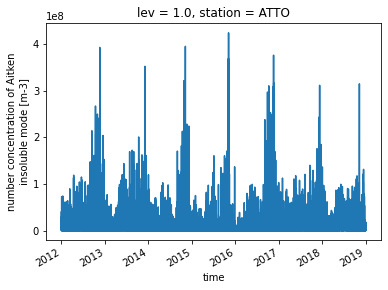

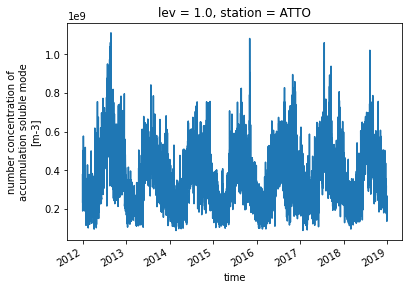

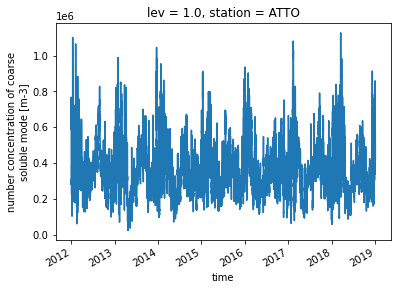

In [96]:
for n in num_vars:
    ds_ukesm[n].plot()
    plt.show()

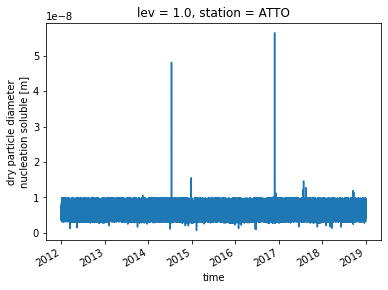

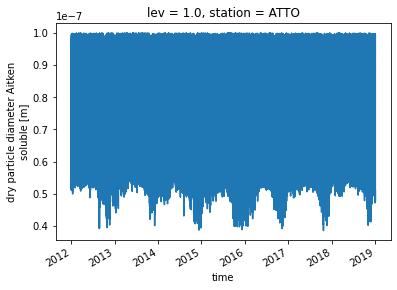

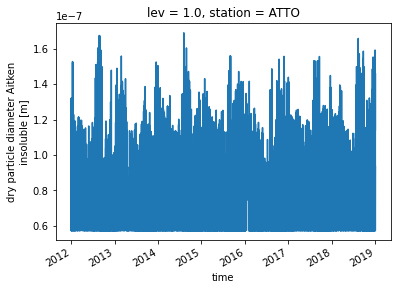

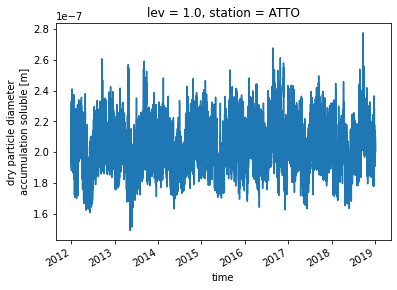

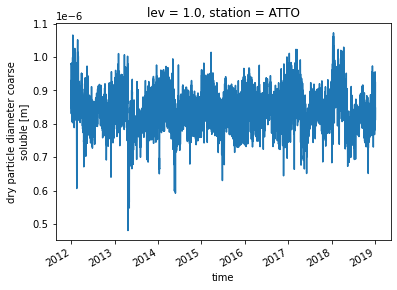

In [97]:
for n in diam_vars:
    ds_ukesm[n].plot()
    plt.show()

In [98]:
from bs_fdbck_clean.util.BSOA_datamanip.ukesm import ds2df_ukesm

In [99]:

df, df_sm = ds2df_ukesm(ds_ukesm,
                        take_daily_median=False,
                        #air_density=air_dens,
                        model_lev_i =model_lev_i
                       )
#df.index = df.reset_index()['time'].apply(fix_echam_time)
df

Converting nconcNS from m-3 to cm-3
Converting nconcKS from m-3 to cm-3
Converting nconcKI from m-3 to cm-3
Converting nconcAS from m-3 to cm-3
Converting nconcCS from m-3 to cm-3
Converting ddryNS from m to nm
Converting ddryKS from m to nm
Converting ddryKI from m to nm
Converting ddryAS from m to nm
Converting ddryCS from m to nm
Converting Mass_Conc_OM_NS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KS from kg/m3 to ug/m3
Converting Mass_Conc_OM_KI from kg/m3 to ug/m3
Converting Mass_Conc_OM_AS from kg/m3 to ug/m3
HEY
['Mass_Conc_OM_AS', 'Mass_Conc_OM_CS', 'Mass_Conc_OM_KI', 'Mass_Conc_OM_KS', 'Mass_Conc_OM_NS', 'T', 'ddryAS', 'ddryCS', 'ddryKI', 'ddryKS', 'ddryNS', 'mmrtr_OM_AS', 'mmrtr_OM_CS', 'mmrtr_OM_KI', 'mmrtr_OM_KS', 'mmrtr_OM_NS', 'nconcAS', 'nconcCS', 'nconcKI', 'nconcKS', 'nconcNS', 'nconcAS_uncorrected', 'nconcCS_uncorrected', 'nconcKI_uncorrected', 'nconcKS_uncorrected', 'nconcNS_uncorrected', 'SFisoprene', 'SFterpene', 'N50', 'N70', 'N100', 'N150', 'N200', 'N500', 'N50

,lev,station,Mass_Conc_OM_AS,Mass_Conc_OM_CS,Mass_Conc_OM_KI,Mass_Conc_OM_KS,Mass_Conc_OM_NS,T,ddryAS,ddryCS,...,N50-500,N70-500,N100-500,N150-500,N200-500,OA,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,1.0,ATTO,2.939244,4.725360e-11,1.396400e-03,0.540469,4.186296e-08,303.825195,222.344589,979.535461,...,494.930666,451.012716,370.347238,257.972510,163.759504,3.481109,30.675201,False,False,False
2012-01-01 03:00:00,1.0,ATTO,3.881146,5.328379e-11,9.574612e-03,0.129826,6.732455e-08,302.656006,206.173279,979.962463,...,535.169669,483.078148,420.888468,325.234380,205.548405,4.020547,29.506012,False,False,False
2012-01-01 06:00:00,1.0,ATTO,4.034090,5.446556e-11,2.224555e-02,0.234985,7.031415e-08,301.975098,209.872742,980.069702,...,595.410919,534.536530,451.048773,336.422558,213.201347,4.291321,28.825104,False,False,False
2012-01-01 09:00:00,1.0,ATTO,3.923961,5.198686e-11,3.997120e-02,0.224316,5.440504e-07,300.696045,211.622559,971.945740,...,597.159461,527.481627,436.389744,322.635398,205.833474,4.188249,27.546051,False,False,False
2012-01-01 12:00:00,1.0,ATTO,3.846906,5.580071e-11,0.000000e+00,0.262913,2.023390e-08,299.648438,225.895172,952.431458,...,408.234946,386.678708,346.130334,274.804447,188.316044,4.109820,26.498444,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 09:00:00,1.0,ATTO,2.503517,5.030667e-11,2.491204e-02,0.048116,1.294126e-12,299.583496,202.643967,925.252747,...,311.462148,298.397980,275.695134,216.696496,134.540320,2.576546,26.433502,False,False,False
2018-12-31 12:00:00,1.0,ATTO,2.510262,5.169783e-11,0.000000e+00,0.003969,1.282152e-12,300.310547,211.433960,913.688721,...,231.645081,228.043936,222.736421,189.975358,126.529597,2.514231,27.160553,False,False,False
2018-12-31 15:00:00,1.0,ATTO,1.476927,3.088205e-11,3.495080e-07,0.002391,2.921651e-13,303.142334,211.434998,810.903442,...,143.273473,140.290775,136.867281,116.798762,77.823926,1.479319,29.992340,False,False,False


### Assuming standard pressure for UKESM (since we don't have this and the effect is marginal)

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [100]:
from bs_fdbck_clean.util.BSOA_datamanip import pressure_default, standard_air_density,R

In [101]:
df['T_C']

time
2012-01-01 00:00:00    30.675201
2012-01-01 03:00:00    29.506012
2012-01-01 06:00:00    28.825104
2012-01-01 09:00:00    27.546051
2012-01-01 12:00:00    26.498444
                         ...    
2018-12-31 09:00:00    26.433502
2018-12-31 12:00:00    27.160553
2018-12-31 15:00:00    29.992340
2018-12-31 18:00:00    32.705475
2018-12-31 21:00:00    33.200836
Name: T_C, Length: 20456, dtype: float32

In [102]:
df['density'] = 1e5/(R*(df['T_C']+273.15))

<AxesSubplot:xlabel='time'>

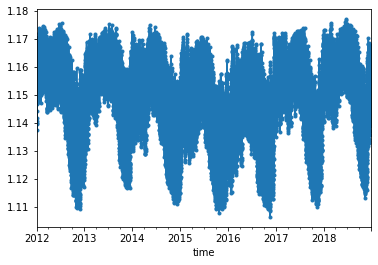

In [103]:
df['density'].plot(marker='.')

In [104]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [105]:
vl = ['OA','N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting OA
converting N100
converting N200
converting N50
converting N500


<AxesSubplot:xlabel='time'>

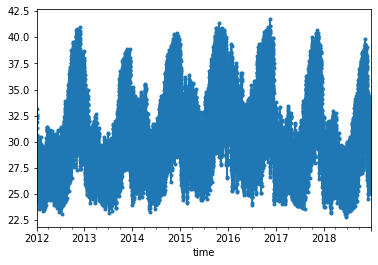

In [106]:
df['T_C'].plot(marker='.')#.columns#['Temperature'].plot()

<AxesSubplot:xlabel='time'>

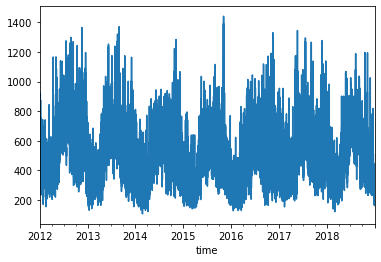

In [107]:
df['N50_STP'].plot()#.columns#['Temperature'].plot()

<AxesSubplot:ylabel='Frequency'>

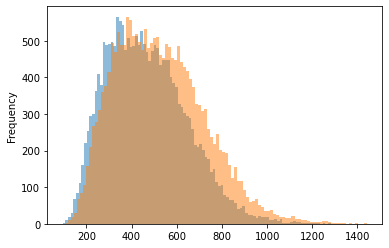

In [108]:
df['N50_amb'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()
df['N50_STP'].plot.hist(bins=100, alpha=.5)#.columns#['Temperature'].plot()

### UKESM Shift time step to start of period to be consistent with measurements and other models

In [109]:
ind = df.index
df.index = ind - datetime.timedelta(hours=1)

### Save result

In [110]:


_di = {case_name_ukesm:df}
_dism = {case_name_ukesm:df_sm}

dic_df_mod_case['UKESM']= _di.copy()
dic_dfsm_mod_case['UKESM'] = _dism.copy()

## Adjust NorESM

In [111]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

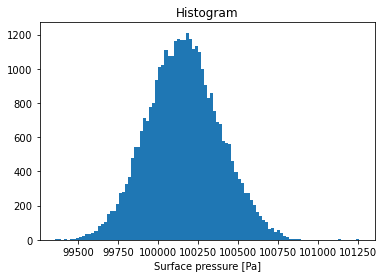

In [112]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

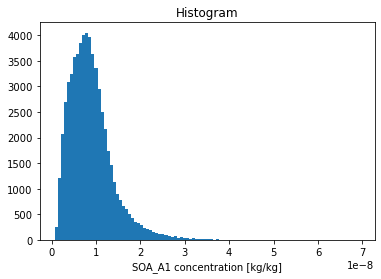

In [113]:
ds_noresm['SOA_A1'].plot.hist(bins=100);

In [114]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

### Run ds2df NorESM

In [115]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=standard_air_density,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()

hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
df1


### NorESM needs correcting only for number concentrations

Converting by:

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb}
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [116]:
df = dic_df_mod_case['NorESM'][case_noresm]

In [117]:
if 'OA' in df.columns:
    df = df.rename({'OA':'OA_STP'}, axis=1)

In [118]:
pressure = df['PS']
temperature = df['T_C']

In [119]:
df['density'] = pressure/(R*(temperature+273.15))

<AxesSubplot:xlabel='time'>

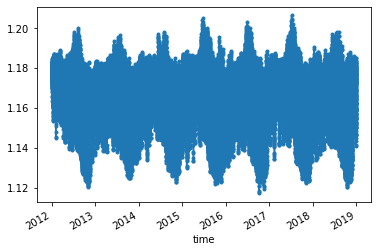

In [120]:
df['density'].plot(marker='.')

In [121]:
df['ambient2stp_correction_factor'] = (1/df['density'])*standard_air_density

In [122]:
vl = ['N100','N200','N50','N500']
for v in vl:
    if v in df:
        df = df.rename({v:f'{v}_amb'}, axis=1)
        df[f'{v}_STP'] = df[f'{v}_amb']*df['ambient2stp_correction_factor']
        print(f'converting {v}')

converting N100
converting N200
converting N50
converting N500


In [123]:
dic_df_mod_case['NorESM'][case_noresm] = df

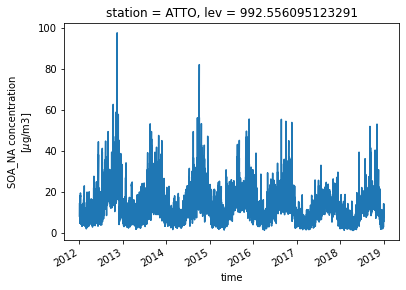

In [124]:
dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

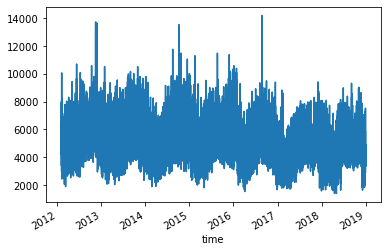

In [125]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

In [126]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']#['50-500'].plot()

,station,ACTREL,lev,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,...,SOA,OAG,OA,POA,SO4,hour,is_JJA,is_JA,isSummer,year
time,,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,ATTO,0.0,992.556095,9.760506e-12,1.927384e-12,5.984160e-12,1.493344e-13,9.143349e-13,2.501827e-15,0.000015,...,7.940115,8.172068,8.131874,0.191759,0.136086,0,False,False,False,2012
2012-01-02 01:00:00,ATTO,0.0,992.556095,1.173306e-11,1.929752e-12,6.213474e-12,1.896768e-13,1.132375e-12,2.577372e-15,0.000016,...,8.275569,8.516039,8.475479,0.199910,0.136624,1,False,False,False,2012
2012-01-02 02:00:00,ATTO,0.0,992.556095,1.415127e-11,1.925523e-12,6.477718e-12,2.003883e-13,1.141799e-12,2.292829e-15,0.000016,...,8.640816,8.890565,8.848861,0.208045,0.136771,2,False,False,False,2012
2012-01-02 03:00:00,ATTO,0.0,992.556095,1.652238e-11,1.922480e-12,6.741639e-12,1.983007e-13,1.098991e-12,2.073961e-15,0.000017,...,9.032463,9.290863,9.248313,0.215850,0.136924,3,False,False,False,2012
2012-01-02 04:00:00,ATTO,0.0,992.556095,1.885198e-11,1.922657e-12,7.010868e-12,1.940676e-13,1.057981e-12,1.893479e-15,0.000018,...,9.455190,9.722221,9.678909,0.223719,0.137232,4,False,False,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,ATTO,0.0,992.556095,1.271645e-11,8.905731e-12,1.806477e-11,1.167250e-16,6.621503e-16,4.053920e-17,0.000010,...,7.815759,8.497025,8.391290,0.575531,0.514882,20,False,False,False,2018
2018-12-31 21:00:00,ATTO,0.0,992.556095,1.581240e-11,9.842340e-12,2.055645e-11,3.577547e-15,1.148899e-15,4.035565e-17,0.000012,...,9.484868,10.234805,10.138273,0.653405,0.581504,21,False,False,False,2018
2018-12-31 22:00:00,ATTO,0.0,992.556095,1.670743e-11,9.721081e-12,2.054445e-11,4.614713e-14,2.507567e-13,4.529189e-15,0.000013,...,10.001804,10.719428,10.654877,0.653073,0.583924,22,False,False,False,2018


<AxesSubplot:xlabel='time'>

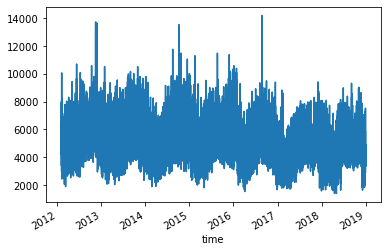

In [127]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

### NorESM Shift time step to start of period to be consistent with measurements and other models

In [128]:
ind = df.index
df.index = ind - datetime.timedelta(hours=1)

## ALL MODELS: SHIFT TIME to ATTO which is  european winter time EET UTC-4

In [129]:
import datetime

In [130]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind - datetime.timedelta(hours=4)

In [131]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2011-12-31 20:00:00', '2011-12-31 21:00:00',
               '2011-12-31 22:00:00', '2011-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 19:00:00', '2012-01-01 20:00:00',
               '2012-01-01 21:00:00', '2012-01-01 22:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2011-12-31 20:00:00', '2011-12-31 21:00:00',
               '2011-12-31 22:00:00', '2011-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2011-12-31 19:00:00', '2011-12-31 22:00:00',
               '2012-01-01 01:00:00', '2012-01-01 04:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


### Compute N50-500 etc.

In [132]:
for mo in models:
    print(mo)
    for ca in di_mod2cases[mo]:
        df = dic_df_mod_case[mo][ca]
        
        for v in ['N50', 'N100', 'N200']:
            _v2 = f'{v}_STP'
            _v2_minus = f'N500_STP'
            if v in df.columns:
                df[v + '-500'] = df[v] - df['N500']
                print(f'computing {v}-500')
            if _v2 in df.columns:
                df[f'{v}-500_STP'] = df[_v2]-df[_v2_minus]
                print(f'computing {v}-500_STP')
                
        dic_df_mod_case[mo][ca] = df
            
        print(v)

ECHAM-SALSA
computing N50-500
computing N100-500
computing N200-500
N200
NorESM
computing N50-500_STP
computing N100-500_STP
computing N200-500_STP
N200
EC-Earth
computing N50-500_STP
computing N100-500_STP
computing N200-500_STP
N200
UKESM
computing N50-500_STP
computing N100-500_STP
computing N200-500_STP
N200


#### NorESM

In [133]:
rn_dict_echam

{'ORG_mass_conc': 'OA', 'tempair': 'T'}

<AxesSubplot:xlabel='time'>

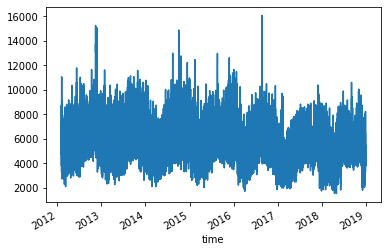

In [134]:
df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']
#df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp']
df['N50_STP'].plot()

In [135]:
df['T']

time
2012-01-01 19:00:00    297.995819
2012-01-01 20:00:00    297.735352
2012-01-01 21:00:00    297.502686
2012-01-01 22:00:00    297.305969
2012-01-01 23:00:00    297.157898
                          ...    
2018-12-31 15:00:00    302.181549
2018-12-31 16:00:00    301.347382
2018-12-31 17:00:00    300.516052
2018-12-31 18:00:00    299.889465
2018-12-31 19:00:00    299.471436
Name: T, Length: 61345, dtype: float32

## Write to file:

In [136]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        #else:
        #    fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-1.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-1.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK_clean/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-1.csv


In [137]:
dic_df_mod_case[mod][ca]['OA_STP']#.plot()

time
2011-12-31 19:00:00    3.923348
2011-12-31 22:00:00    4.513878
2012-01-01 01:00:00    4.807038
2012-01-01 04:00:00    4.671707
2012-01-01 07:00:00    4.568253
                         ...   
2018-12-31 04:00:00    2.863328
2018-12-31 07:00:00    2.800859
2018-12-31 10:00:00    1.663504
2018-12-31 13:00:00    1.593472
2018-12-31 16:00:00    1.781929
Name: OA_STP, Length: 20456, dtype: float64

In [138]:
pd.read_csv('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv')

,time,station,ACTREL,lev,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,...,year,density,ambient2stp_correction_factor,N100_STP,N200_STP,N50_STP,N500_STP,N50-500_STP,N100-500_STP,N200-500_STP
0,2012-01-01 20:00:00,ATTO,0.0,992.556095,9.760506e-12,1.927384e-12,5.984160e-12,1.493344e-13,9.143349e-13,2.501827e-15,...,2012,1.170136,1.104357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01 21:00:00,ATTO,0.0,992.556095,1.173306e-11,1.929752e-12,6.213474e-12,1.896768e-13,1.132375e-12,2.577372e-15,...,2012,1.171287,1.103271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-01 22:00:00,ATTO,0.0,992.556095,1.415127e-11,1.925523e-12,6.477718e-12,2.003883e-13,1.141799e-12,2.292829e-15,...,2012,1.172208,1.102405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-01 23:00:00,ATTO,0.0,992.556095,1.652237e-11,1.922480e-12,6.741639e-12,1.983007e-13,1.098991e-12,2.073961e-15,...,2012,1.172795,1.101852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-02 00:00:00,ATTO,0.0,992.556095,1.885198e-11,1.922657e-12,7.010868e-12,1.940676e-13,1.057980e-12,1.893479e-15,...,2012,1.173101,1.101565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2018-12-31 16:00:00,ATTO,0.0,992.556095,1.271645e-11,8.905731e-12,1.806477e-11,1.167250e-16,6.621503e-16,4.053920e-17,...,2018,1.152035,1.121709,2340.131141,186.820662,4030.561833,17.203504,4013.358329,2322.927636,169.617158
61341,2018-12-31 17:00:00,ATTO,0.0,992.556095,1.581240e-11,9.842340e-12,2.055645e-11,3.577547e-15,1.148899e-15,4.035565e-17,...,2018,1.155580,1.118267,2700.005192,205.218780,4666.414106,17.933980,4648.480126,2682.071211,187.284799
61342,2018-12-31 18:00:00,ATTO,0.0,992.556095,1.670743e-11,9.721081e-12,2.054445e-11,4.614713e-14,2.507567e-13,4.529189e-15,...,2018,1.159257,1.114720,3176.597880,244.901813,5331.926690,19.919424,5312.007266,3156.678456,224.982389
61343,2018-12-31 19:00:00,ATTO,0.0,992.556095,1.702979e-11,9.383068e-12,2.011836e-11,1.544003e-13,1.032464e-12,2.015866e-14,...,2018,1.162130,1.111965,3184.997285,244.281019,5316.344722,19.271101,5297.073621,3165.726184,225.009918
